In [18]:
import psycopg2
import matplotlib.pyplot as plt
from tabulate import tabulate 

months_by_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
quarter_name = ['1st', '2nd', '3rd', '4th']

try:
    connection = psycopg2.connect(
        dbname = "fatorvgestao",
        user= "fatorv",
        password = "123456",
        host = "localhost"
    )
    print("Conectado com sucesso.")
except psycopg2.Error as e:
    print("Erro ao conectar - ", e)

cursor = connection.cursor()


Conectado com sucesso.


<h1>Produtos mais vendidos por ano<h1>
<hr>

+--------------------+-----------------+
| product_name       |   quantity_sold |
+====================+=================+
| PIZZA              |               6 |
+--------------------+-----------------+
| LIPSTICK           |               3 |
+--------------------+-----------------+
| BASKETBALL         |               3 |
+--------------------+-----------------+
| OFFICE CHAIR       |               3 |
+--------------------+-----------------+
| SMARTPHONE         |               3 |
+--------------------+-----------------+
| REMOTE CONTROL CAR |               3 |
+--------------------+-----------------+
| MICROWAVE OVEN     |               1 |
+--------------------+-----------------+
+----------------+-----------------+
| product_name   |   quantity_sold |
+================+=================+
| PIZZA          |               4 |
+----------------+-----------------+
| JEANS          |               4 |
+----------------+-----------------+
| LIPSTICK       |               4 |
+------

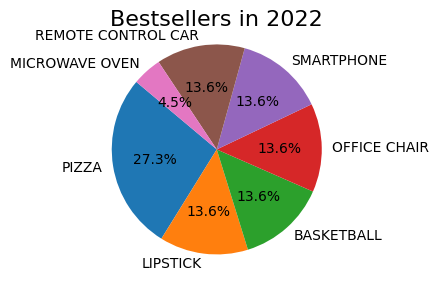

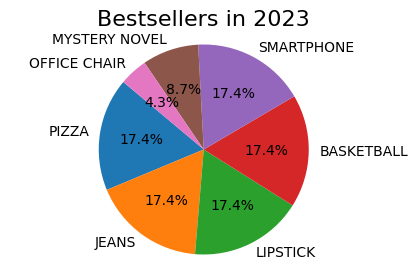

In [19]:
for year in range(2022, 2024):
    query = f"""
    SELECT
        pr.product_name,
        SUM(f.quantity) as quantity_sold
    FROM
        fato_sales_items f
    INNER JOIN
        dim_products pr on f.product_id = pr.product_id
    INNER JOIN
        dim_date dt on f.date_id = dt.date_id
    WHERE
        dt.year = {year}
    GROUP BY
        pr.product_name
    ORDER BY
        quantity_sold DESC
    """
    try:
        cursor.execute(query)
        rows = cursor.fetchall()
        print(tabulate(rows, headers=['product_name', 'quantity_sold'], tablefmt='grid'))
        labels = [row[0] for row in rows]
        quantities = [row[1] for row in rows]
        plt.figure(figsize=(5, 3))
        plt.pie(quantities, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title("Bestsellers in " + str(year), fontsize = 16)
    except psycopg2.Error as e:
        print("Erro - ", e)

<h1>As vendas ocorreram em apenas duas datas distintas<h1>
Logo, as representações por trimestre e mês são idênticas.
<hr>

In [20]:
query = """
SELECT DISTINCT
        dt.year,
        dt.month,
        dt.month_name,
        dt.day,
        dt.quarter
    FROM
        fato_sales_items si
    INNER JOIN
        dim_date dt on si.date_id = dt.date_id
    ORDER BY
        dt.year, dt.month, dt.day ASC;
"""
try:
    cursor.execute(query)
    rows = cursor.fetchall()
    print(tabulate(rows, headers=['year', 'month', 'month_name', 'day', 'quarter'], tablefmt='grid'))
except psycopg2.Error as e:
    print("Erro - ", e)

+--------+---------+--------------+-------+-----------+
|   year |   month | month_name   |   day |   quarter |
+========+=========+==============+=======+===========+
|   2022 |       8 | August       |    20 |         3 |
+--------+---------+--------------+-------+-----------+
|   2023 |       5 | May          |    15 |         2 |
+--------+---------+--------------+-------+-----------+


<h1>Produtos mais vendidos por trimestre<h1>
<hr>

+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+--------------------+-----------------+
| product_name       |   quantity_sold |
+====================+=================+
| PIZZA              |               6 |
+--------------------+-----------------+
| REMOTE CONTROL CAR |               3 |
+--------------------+-----------------+
| SMARTPHONE         |               3 |
+--------------------+-----------------+
| BASKETBALL         |               3 |
+--------------------+-----------------+
| LIPSTICK           |               3 |
+--------------------+-----------------+
| OFFICE CHAIR       |               3 |
+--------------------+-----------------+
| MICROWAVE OVEN     |               1 |
+--------------------+-----------------+


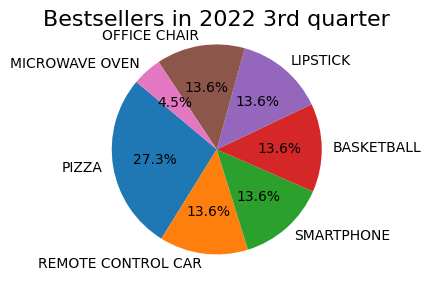

+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   |   quantity_sold |
+================+=================+
| PIZZA          |               4 |
+----------------+-----------------+
| JEANS          |               4 |
+----------------+-----------------+
| SMARTPHONE     |               4 |
+----------------+-----------------+
| BASKETBALL     |               4 |
+----------------+-----------------+
| LIPSTICK       |               4 |
+----------------+-----------------+
| MYSTERY NOVEL  |               2 |
+----------------+-----------------+
| OFFICE CHAIR   |               1 |
+----------------+-----------------+


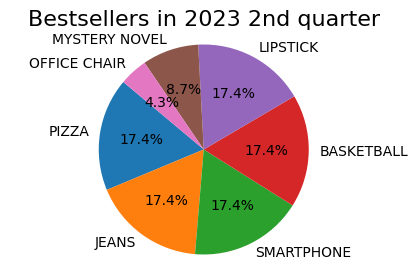

+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+


In [21]:
for year in range(2022, 2024):
    for quarter_num in range(1, 5):    
        query = f"""
        SELECT
            pr.product_name,
            SUM(f.quantity) as quantity_sold
        FROM
            fato_sales_items f
        INNER JOIN
            dim_products pr on f.product_id = pr.product_id
        INNER JOIN
            dim_date dt on f.date_id = dt.date_id
        WHERE
            dt.year = {year} AND dt.quarter = {quarter_num}
        GROUP BY
            f.product_id, pr.product_name
        ORDER BY
            quantity_sold DESC
        """
        try:
            cursor.execute(query)
            rows = cursor.fetchall()
            print(tabulate(rows, headers=['product_name', 'quantity_sold'], tablefmt='grid'))
            labels = [row[0] for row in rows]
            quantities = [row[1] for row in rows]
            
            if(len(labels) > 0):
                plt.figure(figsize=(5, 3))
                plt.pie(quantities, labels=labels, autopct='%1.1f%%', startangle=140)
                plt.axis('equal')
                plt.title("Bestsellers in " + str(year) + " " + quarter_name[quarter_num - 1] + " quarter", fontsize = 16)
                plt.show()
        except psycopg2.Error as e:
            print("Erro - ", e)

<h1>Produtos mais vendidos por mês<h1>
<hr>

+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+

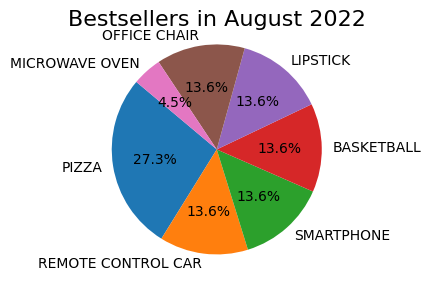

+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+

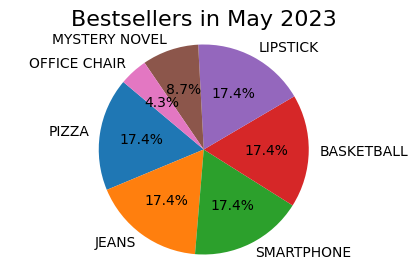

+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+----------------+-----------------+
+----------------+-----------------+
| product_name   | quantity_sold   |
+================+=================+
+

In [22]:
for year in range(2022, 2024):
    for month_num in range(1, 13):
        query = f"""
        SELECT
            pr.product_name,
            SUM(f.quantity) as quantity_sold
        FROM
            fato_sales_items f
        INNER JOIN
            dim_products pr on f.product_id = pr.product_id
        INNER JOIN
            dim_date dt on f.date_id = dt.date_id
        WHERE
            dt.year = {year} AND dt.month = {month_num}
        GROUP BY
            f.product_id, pr.product_name
        ORDER BY
            quantity_sold DESC
        """
        try:
            cursor.execute(query)
            rows = cursor.fetchall()
            print(tabulate(rows, headers=['product_name', 'quantity_sold'], tablefmt='grid'))
            labels = [row[0] for row in rows]
            quantities = [row[1] for row in rows]
            
            if(len(labels) > 0):
                plt.figure(figsize=(5, 3))
                plt.pie(quantities, labels=labels, autopct='%1.1f%%', startangle=140)
                plt.axis('equal')
                plt.title("Bestsellers in "+ months_by_name[month_num - 1] +" " + str(year), fontsize = 16)
                plt.show()
        except psycopg2.Error as e:
            print("Erro - ", e)

<h1>Faturamento total por ano<h1>
<hr>

+--------+-----------------+
|   year |   total_revenue |
+========+=================+
|   2022 |             895 |
+--------+-----------------+
|   2023 |            1372 |
+--------+-----------------+


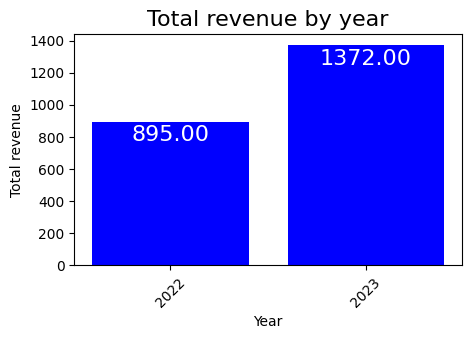

In [23]:
query = """
SELECT DISTINCT
	dt.year,
	SUM(DISTINCT f.total_price) AS total_revenue
FROM
	fato_sales_items f
INNER JOIN
	dim_date dt on f.date_id = dt.date_id
GROUP BY
	dt.year
ORDER BY
    dt.year ASC
"""
try:
    cursor.execute(query)
    rows = cursor.fetchall()
    print(tabulate(rows, headers=['year', 'total_revenue'], tablefmt='grid'))
    year = [str(int(row[0])) for row in rows]
    total_revenue = [row[1] for row in rows]
    plt.figure(figsize=(5, 3))
    bars = plt.bar(year, total_revenue, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Total revenue')
    plt.xticks(rotation = 45)
    plt.title("Total revenue by year", fontsize = 16)
    for bar, revenue in zip(bars, total_revenue):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 120, f'{revenue:.2f}', ha='center', color='white', fontsize = 16)
    plt.show()
except psycopg2.Error as e:
    print("Erro - ", e)

<h1>Faturameto trimestral<h1>
<hr>

+-----------+-----------------+
|   quarter |   total_revenue |
+===========+=================+
|         3 |             895 |
+-----------+-----------------+


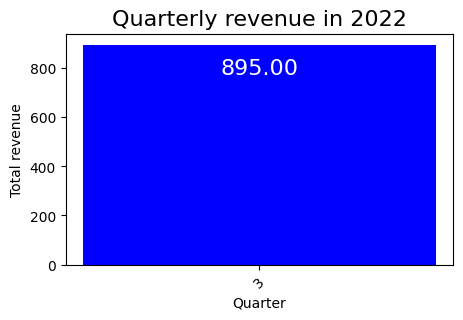

+-----------+-----------------+
|   quarter |   total_revenue |
+===========+=================+
|         2 |            1372 |
+-----------+-----------------+


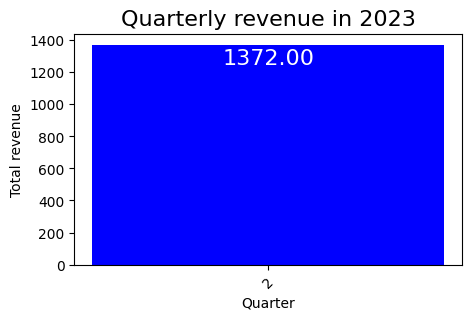

In [24]:
for year in range(2022, 2024):
    query = f"""
    SELECT DISTINCT
        dt.quarter,
        SUM(DISTINCT f.total_price) AS total_revenue
    FROM
        fato_sales_items f
    INNER JOIN
        dim_date dt on f.date_id = dt.date_id
    WHERE
        dt.year = {year}
    GROUP BY
        dt.quarter
    ORDER BY
        dt.quarter ASC
    """
    try:
        cursor.execute(query)
        rows = cursor.fetchall()
        print(tabulate(rows, headers=['quarter', 'total_revenue'], tablefmt='grid'))
        quarter = [str(int(row[0])) for row in rows]
        total_revenue = [row[1] for row in rows]
        plt.figure(figsize=(5, 3))
        bars = plt.bar(quarter, total_revenue, color='blue')
        plt.xlabel('Quarter')
        plt.ylabel('Total revenue')
        plt.xticks(rotation = 45)
        plt.title("Quarterly revenue in " + str(year), fontsize = 16)
        for bar, revenue in zip(bars, total_revenue):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 120, f'{revenue:.2f}', ha='center', color='white', fontsize = 16)
        plt.show()
    except psycopg2.Error as e:
        print("Erro - ", e)

<h1>Faturamento mensal<h1>
<hr>

+----+--------------+-----------------+
|    | month_name   |   total_revenue |
+====+==============+=================+
|  8 | August       |             895 |
+----+--------------+-----------------+


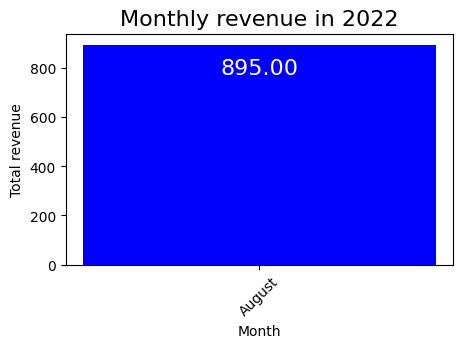

+----+--------------+-----------------+
|    | month_name   |   total_revenue |
+====+==============+=================+
|  5 | May          |            1372 |
+----+--------------+-----------------+


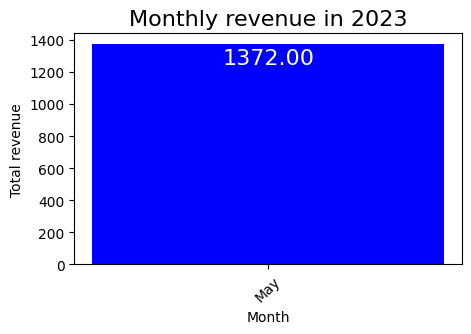

In [25]:
for year in range(2022, 2024):
    query = f"""
    SELECT DISTINCT
        dt.month,
        dt.month_name,
        SUM(DISTINCT f.total_price) AS total_revenue
    FROM
        fato_sales_items f
    INNER JOIN
        dim_date dt on f.date_id = dt.date_id
    WHERE
        dt.year = {year}
    GROUP BY
        dt.month, dt.month_name
    ORDER BY
        dt.month ASC
    """
    try:
        cursor.execute(query)
        rows = cursor.fetchall()
        print(tabulate(rows, headers=['month_name', 'total_revenue'], tablefmt='grid'))
        month = [row[1] for row in rows]
        total_revenue = [row[2] for row in rows]
        plt.figure(figsize=(5, 3))
        bars = plt.bar(month, total_revenue, color='blue')
        plt.xlabel('Month')
        plt.ylabel('Total revenue')
        plt.xticks(rotation = 45)
        plt.title("Monthly revenue in " + str(year), fontsize = 16)
        for bar, revenue in zip(bars, total_revenue):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 120, f'{revenue:.2f}', ha='center', color='white', fontsize = 16)
        plt.show()
    except psycopg2.Error as e:
        print("Erro - ", e)

<h1>Faturamento por categoria(anual)<h1>
<hr>

+-----------------+-----------------+
| category_name   |   total_revenue |
+=================+=================+
| BEAUTY          |             150 |
+-----------------+-----------------+
| ELECTRONICS     |             120 |
+-----------------+-----------------+
| FOOD            |             341 |
+-----------------+-----------------+
| FURNITURE       |             105 |
+-----------------+-----------------+
| HOME APPLIANCES |              25 |
+-----------------+-----------------+
| SPORTS          |              76 |
+-----------------+-----------------+
| TOYS            |              78 |
+-----------------+-----------------+


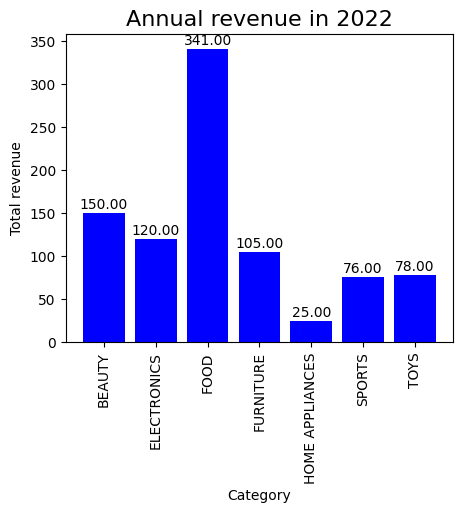

+-----------------+-----------------+
| category_name   |   total_revenue |
+=================+=================+
| BEAUTY          |              60 |
+-----------------+-----------------+
| BOOKS           |              58 |
+-----------------+-----------------+
| CLOTHING        |             144 |
+-----------------+-----------------+
| ELECTRONICS     |             839 |
+-----------------+-----------------+
| FOOD            |              51 |
+-----------------+-----------------+
| FURNITURE       |             120 |
+-----------------+-----------------+
| SPORTS          |             100 |
+-----------------+-----------------+


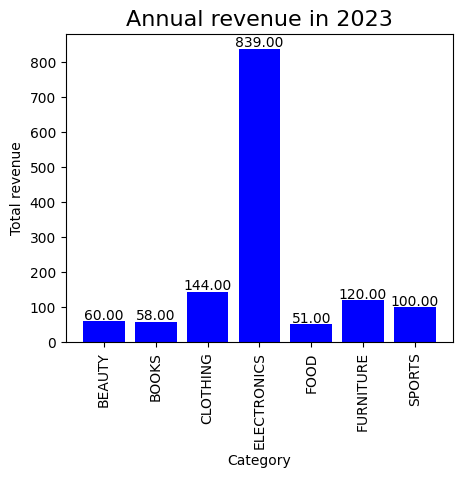

In [26]:
for year in range(2022, 2024):
    query = f"""
    SELECT DISTINCT
        ca.category_name,
        SUM(DISTINCT si.sell_price * si.quantity) AS total_revenue
    FROM
        dim_categories ca
    INNER JOIN
        fato_sales_items si on si.category_id = ca.category_id
    INNER JOIN
        dim_date dt on si.date_id = dt.date_id
    WHERE
        dt.year = {year}
    GROUP BY
        ca.category_name
    ORDER BY
        ca.category_name
    """
    try:
        cursor.execute(query)
        rows = cursor.fetchall()
        print(tabulate(rows, headers=['category_name', 'total_revenue'], tablefmt='grid'))
        category = [row[0] for row in rows]
        total_revenue = [row[1] for row in rows]
        plt.figure(figsize=(5, 4))
        bars = plt.bar(category, total_revenue, color='blue')
        plt.xlabel('Category')
        plt.ylabel('Total revenue')
        plt.xticks(rotation = 90)
        plt.title("Annual revenue in " + str(year), fontsize = 16)
        for bar, revenue in zip(bars, total_revenue):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{revenue:.2f}', ha='center', color='black', fontsize = 10)
        plt.show()
    except psycopg2.Error as e:
        print("Erro - ", e)

<h1>Faturamento por categoria (trimestral)<h1>
<hr>

+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   |   total_revenue |
+=================+=================+
| BEAUTY          |             150 |
+-----------------+-----------------+
| ELECTRONICS     |             120 |
+-----------------+-----------------+
| FOOD            |             341 |
+-----------------+-----------------+
| FURNITURE       |             105 |
+-----------------+-----------------+
| HOME APPLIANCES |              25 |
+-----------------+-----------------+
| SPORTS          |              76 |
+-----------------+-----------------+
| TOYS            |              78 |
+-----------------+-----------------+


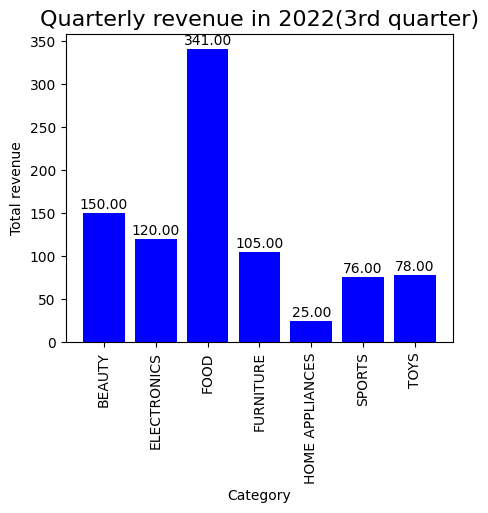

+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   |   total_revenue |
+=================+=================+
| BEAUTY          |              60 |
+-----------------+-----------------+
| BOOKS           |              58 |
+-----------------+-----------------+
| CLOTHING        |             144 |
+-----------------+-----------------+
| ELECTRONICS     |             839 |
+-----------------+-----------------+
| FOOD            |              51 |
+-----------------+-----------------+
| FURNITURE       |             120 |
+-----------------+-----------------+
| SPORTS          |             100 |
+-----------------+-----------------+


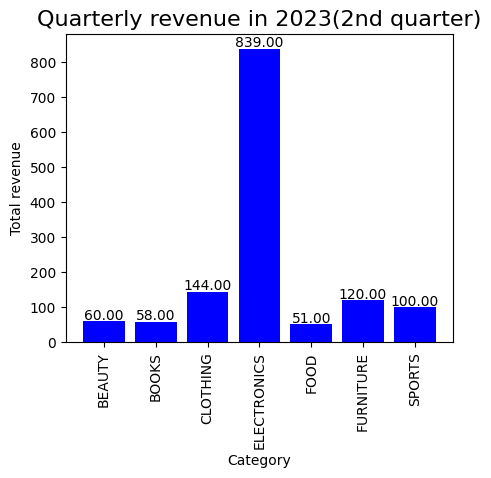

+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+


In [27]:
for year in range(2022, 2024):
    for quarter_num in range(1, 5):
        query = f"""
        SELECT DISTINCT
            ca.category_name,
            SUM(DISTINCT si.sell_price * si.quantity) AS total_revenue
        FROM
            dim_categories ca
        INNER JOIN
            fato_sales_items si on si.category_id = ca.category_id
        INNER JOIN
            dim_date dt on si.date_id = dt.date_id
        WHERE
            dt.year = {year} AND dt.quarter = {quarter_num}
        GROUP BY
            ca.category_name
        ORDER BY
            ca.category_name
        """
        try:
            cursor.execute(query)
            rows = cursor.fetchall()
            print(tabulate(rows, headers=['category_name', 'total_revenue'], tablefmt='grid'))
            category = [row[0] for row in rows]
            total_revenue = [row[1] for row in rows]
            
            if(len(category) > 0):
                plt.figure(figsize=(5, 4))
                bars = plt.bar(category, total_revenue, color='blue')
                plt.xlabel('Category')
                plt.ylabel('Total revenue')
                plt.xticks(rotation = 90)
                plt.title("Quarterly revenue in "+ str(year) +"(" + quarter_name[quarter_num - 1] +" quarter)", fontsize = 16)
                for bar, revenue in zip(bars, total_revenue):
                    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{revenue:.2f}', ha='center', color='black', fontsize = 10)
                plt.show()
        except psycopg2.Error as e:
            print("Erro - ", e)

<h1>Faturamento por categoria(mensal)<h1>
<hr>

+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+===========

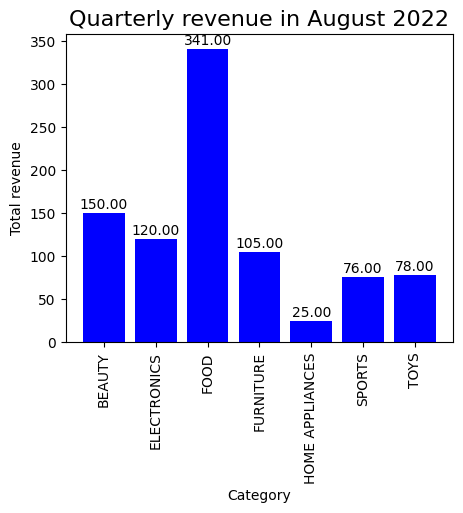

+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+===========

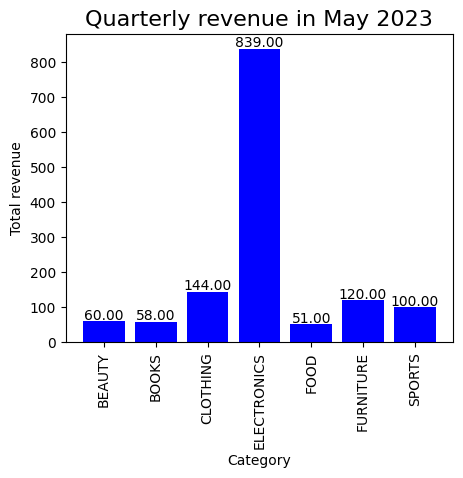

+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+=================+=================+
+-----------------+-----------------+
+-----------------+-----------------+
| category_name   | total_revenue   |
+===========

In [28]:
for year in range(2022, 2024):
    for month in range(1, 13):
        query = f"""
        SELECT DISTINCT
            ca.category_name,
            SUM(DISTINCT si.sell_price * si.quantity) AS total_revenue
        FROM
            dim_categories ca
        INNER JOIN
            fato_sales_items si on si.category_id = ca.category_id
        INNER JOIN
            dim_date dt on si.date_id = dt.date_id
        WHERE
            dt.year = {year} AND dt.month = {month}
        GROUP BY
            ca.category_name
        ORDER BY
            ca.category_name
        """
        try:
            cursor.execute(query)
            rows = cursor.fetchall()
            print(tabulate(rows, headers=['category_name', 'total_revenue'], tablefmt='grid'))
            category = [row[0] for row in rows]
            total_revenue = [row[1] for row in rows]
            
            if(len(category) > 0):
                plt.figure(figsize=(5, 4))
                bars = plt.bar(category, total_revenue, color='blue')
                plt.xlabel('Category')
                plt.ylabel('Total revenue')
                plt.xticks(rotation = 90)
                plt.title("Quarterly revenue in " + months_by_name[month - 1] + " " + str(year), fontsize = 16)
                for bar, revenue in zip(bars, total_revenue):
                    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{revenue:.2f}', ha='center', color='black', fontsize = 10)
                plt.show()
        except psycopg2.Error as e:
            print("Erro - ", e)

<h1>Maiores comissões de vendedores(anual)<h1>
<hr>

+-----------------+--------------+
| seller_name     |   commission |
+=================+==============+
| BEAUTY TRENDS   |         13.8 |
+-----------------+--------------+
| FOOD PARADISE   |         77.4 |
+-----------------+--------------+
| FURNITURE HAVEN |         22.4 |
+-----------------+--------------+
| SPORTS EMPORIUM |         10.4 |
+-----------------+--------------+


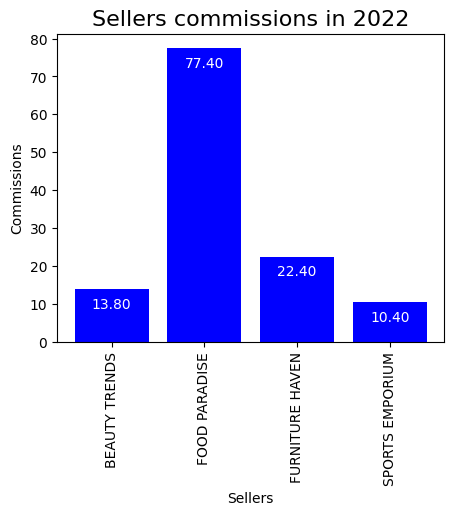

+------------------+--------------+
| seller_name      |   commission |
+==================+==============+
| BEST ELECTRONICS |        90    |
+------------------+--------------+
| BOOK EMPORIUM    |         7.8  |
+------------------+--------------+
| FASHION HOUSE    |        31.92 |
+------------------+--------------+
| STYLE CENTER     |         6.5  |
+------------------+--------------+
| TECH UNIVERSE    |        11.44 |
+------------------+--------------+


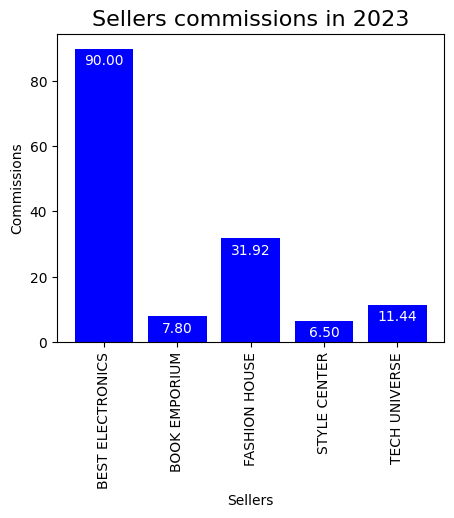

In [29]:
for year in range(2022, 2024):
    query = f"""
    SELECT DISTINCT
        se.seller_name,
        ROUND(SUM(DISTINCT si.total_price * se.tx_commission / 100), 2) AS commission
    FROM
        fato_sales_items si
    INNER JOIN
        dim_sellers se on si.seller_id = se.seller_id
    INNER JOIN
        dim_date dt on si.date_id = dt.date_id
    WHERE
        dt.year = {year}
    GROUP BY
        dt.date, se.seller_name
    ORDER BY
        se.seller_name
    """
    try:
        cursor.execute(query)
        rows = cursor.fetchall()
        print(tabulate(rows, headers=['seller_name', 'commission'], tablefmt='grid'))
        seller_name = [row[0] for row in rows]
        commission = [row[1] for row in rows]
        
        if(len(seller_name) > 0):
            plt.figure(figsize=(5, 4))
            bars = plt.bar(seller_name, commission, color='blue')
            plt.xlabel('Sellers')
            plt.ylabel('Commissions')
            plt.xticks(rotation = 90)
            plt.title("Sellers commissions in " + str(year), fontsize = 16)
            for bar, comm in zip(bars, commission):
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() -5, f'{comm:.2f}', ha='center', color='white', fontsize = 10)
            plt.show()
    except psycopg2.Error as e:
        print("Erro - ", e)

<h1>Maiores comissões de vendedores(trimestral)<h1>
<hr>

+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+-----------------+--------------+
| seller_name     |   commission |
+=================+==============+
| BEAUTY TRENDS   |         13.8 |
+-----------------+--------------+
| FOOD PARADISE   |         77.4 |
+-----------------+--------------+
| FURNITURE HAVEN |         22.4 |
+-----------------+--------------+
| SPORTS EMPORIUM |         10.4 |
+-----------------+--------------+


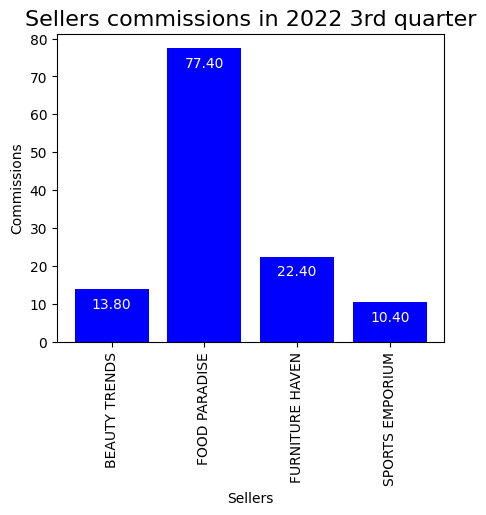

+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+------------------+--------------+
| seller_name      |   commission |
+==================+==============+
| BEST ELECTRONICS |        90    |
+------------------+--------------+
| BOOK EMPORIUM    |         7.8  |
+------------------+--------------+
| FASHION HOUSE    |        31.92 |
+------------------+--------------+
| STYLE CENTER     |         6.5  |
+------------------+--------------+
| TECH UNIVERSE    |        11.44 |
+------------------+--------------+


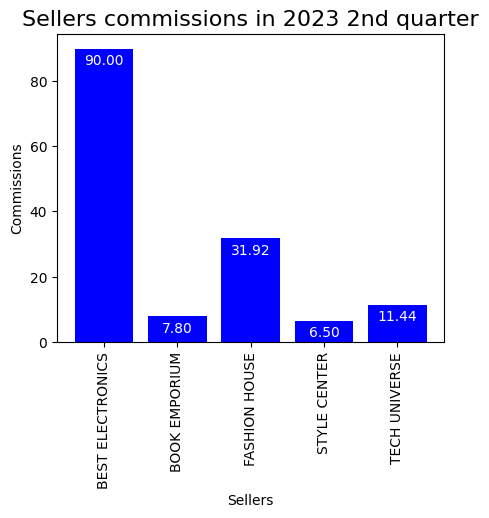

+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+


In [30]:
for year in range(2022, 2024):
    for quarter_num in range(1, 5):
        query = f"""
        SELECT DISTINCT
            se.seller_name,
            ROUND(SUM(DISTINCT si.total_price * se.tx_commission / 100), 2) AS commission
        FROM
            fato_sales_items si
        INNER JOIN
            dim_sellers se on si.seller_id = se.seller_id
        INNER JOIN
            dim_date dt on si.date_id = dt.date_id
        WHERE
            dt.year = {year} AND dt.quarter = {quarter_num}
        GROUP BY
            dt.date, se.seller_name
        ORDER BY
            se.seller_name
        """
        try:
            cursor.execute(query)
            rows = cursor.fetchall()
            print(tabulate(rows, headers=['seller_name', 'commission'], tablefmt='grid'))
            seller_name = [row[0] for row in rows]
            commission = [row[1] for row in rows]
            
            if(len(seller_name) > 0):
                plt.figure(figsize=(5, 4))
                bars = plt.bar(seller_name, commission, color='blue')
                plt.xlabel('Sellers')
                plt.ylabel('Commissions')
                plt.xticks(rotation = 90)
                plt.title("Sellers commissions in " + str(year) + " " + quarter_name[quarter_num - 1] + " quarter", fontsize = 16)
                for bar, comm in zip(bars, commission):
                    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() -5, f'{comm:.2f}', ha='center', color='white', fontsize = 10)
                plt.show()
        except psycopg2.Error as e:
            print("Erro - ", e)

<h1>Maiores comissões de vendedores(mensal)<h1>
<hr>

+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+-----------------+--------------+
| seller_name     |   commission |
+=====

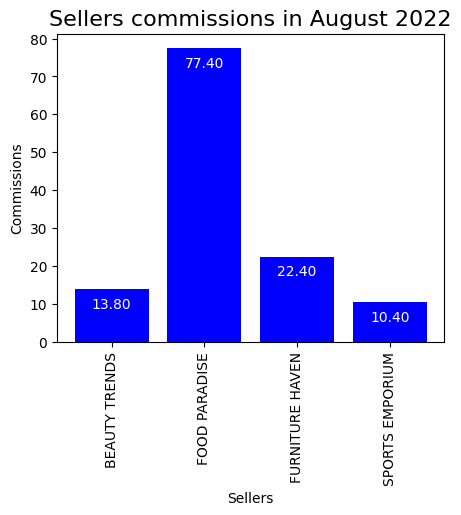

+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+=========

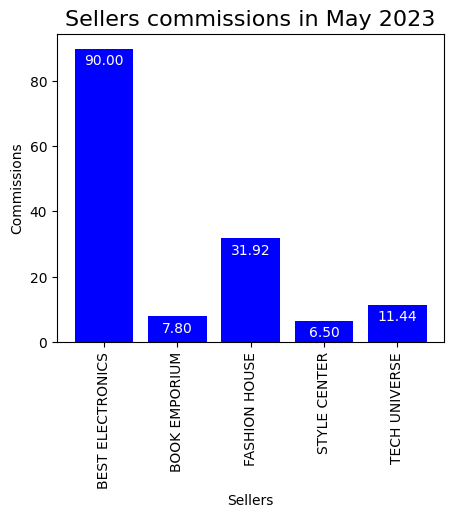

+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+
+---------------+--------------+
| seller_name   | commission   |
+===============+==============+
+---------------+--------------+


In [31]:
for year in range(2022, 2024):
    for month_num in range(1, 13):
        query = f"""
        SELECT DISTINCT
            se.seller_name,
            ROUND(SUM(DISTINCT si.total_price * se.tx_commission / 100), 2) AS commission
        FROM
            fato_sales_items si
        INNER JOIN
            dim_sellers se on si.seller_id = se.seller_id
        INNER JOIN
            dim_date dt on si.date_id = dt.date_id
        WHERE
            dt.year = {year} AND dt.month = {month_num}
        GROUP BY
            dt.date, se.seller_name
        ORDER BY
            se.seller_name
        """
        try:
            cursor.execute(query)
            rows = cursor.fetchall()
            print(tabulate(rows, headers=['seller_name', 'commission'], tablefmt='grid'))
            seller_name = [row[0] for row in rows]
            commission = [row[1] for row in rows]
            
            if(len(seller_name) > 0):
                plt.figure(figsize=(5, 4))
                bars = plt.bar(seller_name, commission, color='blue')
                plt.xlabel('Sellers')
                plt.ylabel('Commissions')
                plt.xticks(rotation = 90)
                plt.title("Sellers commissions in " + months_by_name[month_num - 1]+ " " + str(year), fontsize = 16)
                for bar, comm in zip(bars, commission):
                    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() -5, f'{comm:.2f}', ha='center', color='white', fontsize = 10)
                plt.show()
        except psycopg2.Error as e:
            print("Erro - ", e)

<h1>Fornecedores por estado<h1>
<hr>

+--------------+-----------------------+
| state_name   |   suppliers_per_state |
+==============+=======================+
| WASHINGTON   |                     1 |
+--------------+-----------------------+
| CALIFORNIA   |                     2 |
+--------------+-----------------------+
| NEW YORK     |                     2 |
+--------------+-----------------------+
| TEXAS        |                     2 |
+--------------+-----------------------+
| FLORIDA      |                     2 |
+--------------+-----------------------+


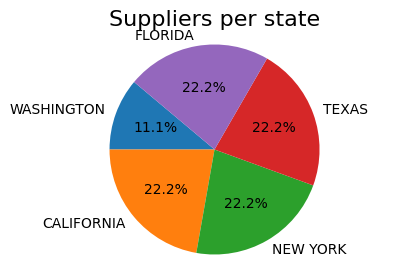

In [32]:
query = f"""
SELECT
	st.state_name,
	COUNT(st.state_id) as suppliers_per_state
FROM
	dim_states st
INNER JOIN
	dim_suppliers su on st.state_id = su.state_id
GROUP BY
	st.state_name
"""
try:
    cursor.execute(query)
    rows = cursor.fetchall()
    print(tabulate(rows, headers=['state_name', 'suppliers_per_state'], tablefmt='grid'))
    state_name = [row[0] for row in rows]
    suppliers_per_state = [row[1] for row in rows]
    
    if(len(state_name) > 0):
        plt.figure(figsize=(5, 3))
        plt.pie(suppliers_per_state, labels=state_name, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title("Suppliers per state", fontsize = 16)
        plt.show()
except psycopg2.Error as e:
    print("Erro - ", e)

<h1>Clientes por estado<h1>
<hr>

+--------------+-----------------------+
| state_name   |   customers_per_state |
+==============+=======================+
| WASHINGTON   |                     1 |
+--------------+-----------------------+
| CALIFORNIA   |                     2 |
+--------------+-----------------------+
| NEW YORK     |                     2 |
+--------------+-----------------------+
| TEXAS        |                     2 |
+--------------+-----------------------+
| FLORIDA      |                     2 |
+--------------+-----------------------+


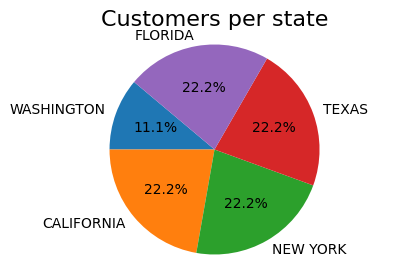

In [33]:
query = f"""
SELECT
	st.state_name,
	COUNT(st.state_id) as customers_per_state
FROM
	dim_states st
INNER JOIN
	dim_customers cu on st.state_id = cu.state_id
GROUP BY
	st.state_name
"""
try:
    cursor.execute(query)
    rows = cursor.fetchall()
    print(tabulate(rows, headers=['state_name', 'customers_per_state'], tablefmt='grid'))
    state_name = [row[0] for row in rows]
    customers_per_state = [row[1] for row in rows]
    
    if(len(state_name) > 0):
        plt.figure(figsize=(5, 3))
        plt.pie(suppliers_per_state, labels=state_name, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title("Customers per state", fontsize = 16)
        plt.show()
except psycopg2.Error as e:
    print("Erro - ", e)

In [34]:
cursor.close()
connection.close()